# Overall structure

* So we will talk a little bit about peergrade
* We are halfway into the course
* Peergrade is about literature on this course. Peergrade is for us all a big reading group
* Peergrade is your place, it is what you enact it to be
* Look at all the nice things we have created
** joyplot
* but that's not maybe what we want
* there are relations here
** generator
* Here are some very nice examples of good reflections
* Reading is also about reading to write
* Somebody also picked up the literary style of Law's "crazy" text (the honey one)
* Considering how peergrade is set up, a good reflection is something that is useful when you *receive* feedback to it. Valuable twice
* Here are some cool reflection <-> feedback interactions
* Maybe there is some "media studies" lesson here that you can think about in your projects too
* Keep on being awesome 🦄

![](https://www.peergrade.io/wp-content/uploads/2017/06/peergrade-blue-300x67.png)

130 students, one 300 word reflection per week, and two 100 word feedbacks to anonymous¹ peers each. 6 weeks so far, out of 14

¹ well "anonymous"

# We are halfway into the course

1. **Complexity Thinking**
1. **Qualitative Approaches to Quantitative Data**
1. **What are Digital Methods?**
1. **Methods Make Worlds**
1. **Problematization**
1. **Network Effects**
1. Situational Mapping
1. Thick Data
1. Data Politics and Publics
1. Mapping Worlds
1. Visualizing Data
1. Storytelling with Data

# Peergrade is a big reading group

<img src="https://www.westernsydney.edu.au/__data/assets/image/0006/852144/ien_ang_2015.jpg" style="float: left; height: 150px"/>

<img src="http://www.sussex.ac.uk/images/people/profile/7513.jpg" style="float: left; height: 150px;"/>

<img src="http://www.tommasoventurini.it/wp/wp-content/uploads/2016/01/TommasoVenturini_large.jpg" style="float: left; height: 150px;"/>

<img src="https://thebreakthrough.org/images/people_profiles/Bruno-Latour-1.jpg" style="float: left; height: 150px;"/>

<img src="https://i1.rgstatic.net/ii/profile.image/AS%3A285798063722497%401445150976911_l/Richard_Rogers13.png" style="float: left; height: 150px;"/>

<img src="https://www2.warwick.ac.uk/fac/cross_fac/cim/people/academic/noortje.jpg?maxWidth=344&maxHeight=344" style="float: left; height: 150px;"/>

<img src="https://pbs.twimg.com/profile_images/658510005579022336/qtPqMAM2.jpg" style="float: left; height: 150px;"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Lucy_Suchman.jpeg/220px-Lucy_Suchman.jpeg" style="float: left; height: 150px;"/>

<img src="http://theconversant.org/wp-content/uploads/2012/12/Haraway-Photo-1.jpg" style="float: left; height: 150px;"/>

<img src="https://images.gr-assets.com/authors/1406520120p5/1276828.jpg" style="float: left; height: 150px;"/>

<img src="http://interaction16.ixda.org/wp-content/uploads/2016/01/wang_tricia-1.jpg" style="float: left; height: 150px;"/>

<img src="http://www.dugumkume.org/wp-content/john-law2.jpg" style="float: left; height: 150px;"/>

<img src="http://www.gurteen.com/gurteen/gurteen.nsf/id/L000992/$File/snowden.jpg" style="float: left; height: 150px;"/>

<img src="http://www.maryboone.com/images/Keynote%20Photo.jpg" style="float: left; height: 150px;"/>

# Peergrade is your place, it is what you enact it to be

## Python environment imports and setup

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats
import lxml.html
import lxml.etree
import zipfile
import string

In [23]:
%matplotlib inline
sns.set()
sns.set_context("talk")

## Data definitions

About the course and the actual data, namely student reflections.

In [9]:
refllen = 300

files = ["reflections-week2.zip",
         "reflections-week3.zip",
         "reflections-week4.zip",
         "reflections-week5.zip",
         "reflections-week6.zip"]

## Reading the data

In [10]:
def readPeergradeFile(filename):
    """Given a filename, assumes it is a Peergrade assignment and reads it into a dict."""
    assignment = dict()
    with zipfile.ZipFile(filename) as zf:
        for name in zf.namelist():
            if not name.endswith(".ipynb"):
                with zf.open(name) as file:
                    assignment[name.strip(".html")] = lxml.html.document_fromstring(file.read().decode('utf-8'))
    return assignment

In [11]:
week2 = readPeergradeFile(files[0])
week3 = readPeergradeFile(files[1])
week4 = readPeergradeFile(files[2])
week5 = readPeergradeFile(files[3])
week6 = readPeergradeFile(files[4])

## Extract the reflections and start NLP by tokenizing

In [12]:
punctremover = str.maketrans('', '', string.punctuation)

def getReflection(data, student):
    """Given data dictionary and student name string, return their reflection as is, as a list."""
    return ''.join(token for token in data.get(student).getchildren()[1].itertext()).strip()

## Analyze reflection lengths

In [80]:
def reflLen(reflection):
    """Given a list of tokens, removes all punctuation and returns it's length in words."""
    l = [token.translate(punctremover) for token in reflection.split(' ')]
    return len(l)

In [13]:
week2lens = pd.Series([reflLen(getReflection(week2, n)) for n in week2], index=week2.keys(), name="Week 2")
week3lens = pd.Series([reflLen(getReflection(week3, n)) for n in week3], index=week3.keys(), name="Week 3")
week4lens = pd.Series([reflLen(getReflection(week4, n)) for n in week4], index=week4.keys(), name="Week 4")
week5lens = pd.Series([reflLen(getReflection(week5, n)) for n in week5], index=week5.keys(), name="Week 5")
week6lens = pd.Series([reflLen(getReflection(week6, n)) for n in week6], index=week6.keys(), name="Week 6")

In [83]:
weeklens = pd.DataFrame({
    'Week2': week2lens,
    'Week3': week3lens,
    'Week4': week4lens,
    'Week5': week5lens,
    'Week6': week6lens
})

For joyplot with `seaborn`, we want to melt the data to narrow shape. So let's do that.

In [16]:
weeklens_m = weeklens.melt()
print(weeklens_m["variable"].value_counts())
weeklens_m.sample(3)

Week2    131
Week3    131
Week6    131
Week5    131
Week4    131
Name: variable, dtype: int64


,variable,value
81,Week2,244.0
99,Week2,324.0
63,Week2,243.0


In [78]:
def joyplot(data):
    """Given a dataframe, plots a joyplot"""
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    sns.set_context("talk")
    pal = sns.cubehelix_palette(len(data["variable"].unique()), rot=0.2, light=0.8, dark=0.4)
    g = sns.FacetGrid(data, row="variable", hue="variable", aspect=10, size=1, palette=pal)
    g.map(sns.kdeplot, "value", bw=.2, lw=1, shade=True, alpha=1, clip_on=False)
    g.map(plt.axhline, y=0, lw=1, clip_on=False)
    g.set_titles("")
    g.fig.subplots_adjust(hspace=-0.8)
    plt.axvline(300, ls="dotted", c="black", lw=6)
    g.set(yticks=[])
    g.despine(bottom=True, left=True);

# Look at all the nice things we have created

Distribution of reflection lengths, first week at the back, and newer weeks at the front.

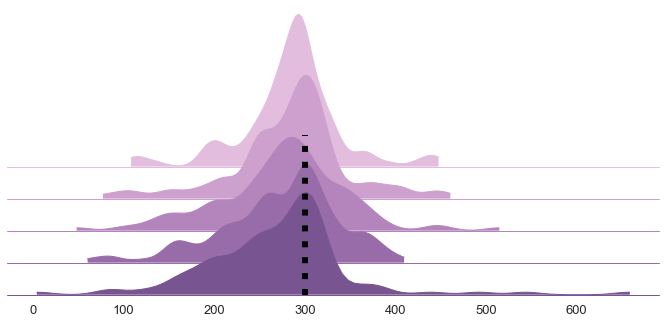

In [79]:
joyplot(weeklens_m)

But that's not maybe what we want to know

There are relations here

![](gephi-hairball.png)

In [ ]:
Text generator

> example 1

> example 2

> example 3

> example 4

> example 5

![](https://media.giphy.com/media/giHQ2odvRQ5oc/giphy.gif)

Here are some cool bits from the reflections

> example 1

> example 2

> example 3

> example 4

> example 5

Reading is also about learning to write

Somebody picked up the Law style of writing

> quote

Considering how peergrade is set up, a good reflection is something that is useful when you *receive* feedback to it. Valuable twice

Here are some cool reflection <-> feedback interactions

> example 1

> example 2

> example 3

Maybe there is some lesson here that you can think about in your projects too, what does the configuration of the situation do to knowledge

Keep on being awesome 🦄